<a href="https://colab.research.google.com/github/Domovou/fastpages_blog/blob/master/Hotdog_finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotdog finder

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastbook import *


In [ ]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
configId = "efb1b149-c219-4091-be6d-14a279c405c4"

In [ ]:
subscriptionKey = "1be3ada0f2a649d087e9fb39798485a0"

In [ ]:
def search_images_bing_new(key, term, customConfigId, min_sz=128):
	url = 'https://api.bing.microsoft.com/v7.0/custom/images/search?' + 'q=' + term + '&' + 'customconfig=' + customConfigId + '&' + 'count=150'
	r = requests.get(url, headers={'Ocp-Apim-Subscription-Key': key})
	search_results = r.json()
	return L([img["thumbnailUrl"] + ".jpg" for img in search_results["value"][:150]])

In [ ]:
hotdogImages = search_images_bing_new(subscriptionKey, "hotdog", configId)

In [ ]:
firstHotdogImage = hotdogImages[0]
hotdogDest = "hotdog.jpg"
download_url(firstHotdogImage, hotdogDest)

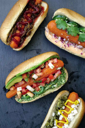

In [ ]:
hotdogImg = Image.open(hotdogDest)
hotdogImg.to_thumb(128,128)

In [ ]:
hotdogPath = Path('hotdogs')
if not hotdogPath.exists():
  hotdogPath.mkdir()
download_images("hotdogs", urls = hotdogImages)

In [ ]:
hotdogImageFiles = get_image_files("hotdogs")

In [ ]:
failedHotdogs = verify_images(hotdogImageFiles)
failedHotdogs

(#0) []

In [ ]:
foodImages = search_images_bing_new(subscriptionKey, "food -hotdog", configId)
foodPath = Path('food')
if not foodPath.exists():
  foodPath.exists()
download_images(foodPath, urls=foodImages)
foodImageFiles = get_image_files(foodPath)
failedFood = verify_images(foodImageFiles)
failedFood

(#0) []

In [ ]:
foods = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
foods = foods.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [ ]:
dls = foods.dataloaders("images")

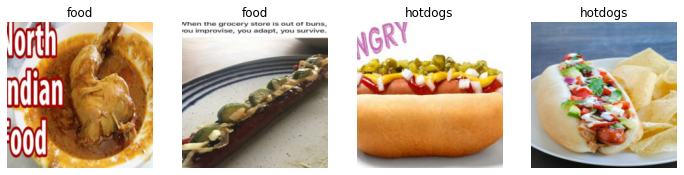

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.204669,0.573202,0.266667,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.551897,0.288518,0.100000,00:03
1,0.439661,0.272065,0.050000,00:03
2,0.362033,0.295560,0.050000,00:03
3,0.320297,0.365100,0.066667,00:03
4,0.263752,0.328156,0.083333,00:03
5,0.222927,0.283832,0.050000,00:03
6,0.191719,0.262306,0.050000,00:03
7,0.169909,0.257237,0.050000,00:03


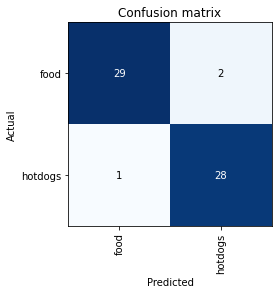

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.export()

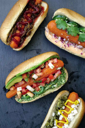

In [ ]:
Image.open("hotdog.jpg").to_thumb(128,128)

In [ ]:
pred,pred_idx,probs = learn.predict("hotdog.jpg")
pred,pred_idx,probs

('hotdogs', tensor(1), tensor([8.7614e-06, 9.9999e-01]))

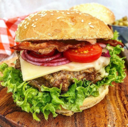

In [ ]:
Image.open("burger.jpg").to_thumb(128,128)

In [ ]:
pred,pred_idx,probs = learn.predict("burger.jpg")
f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

'Prediction: food; Probability: 0.9992'

In [ ]:
import ipywidgets as widgets
from PIL import *

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
out_pl

Output()